# Credit Risk Analysis

### Problem Statement
One of the leading banks would like to predict bad customer while customer applying for loan. This model also called as PD Models (Probability of Default)

Credit scoring is perhaps one of the most "classic" applications for predictive modeling, to predict whether or not credit extended to an applicant will likely result in profit or losses for the lending institution. There are many variations and complexities regarding how exactly credit is extended to individuals, businesses, and other organizations for various purposes (purchasing equipment, real estate, consumer items, and so on), and using various methods of credit (credit card, loan, delayed payment plan). But in all cases, a lender provides money to an individual or institution, and expects to be paid back in time with interest commensurate with the risk of default. Credit scoring is the set of decision models and their underlying techniques that aid lenders in the granting of consumer credit. These techniques determine who will get credit, how much credit they should get, and what operational strategies will enhance the profitability of the borrowers to the lenders. Further, they help to assess the risk in lending. Credit scoring is a dependable assessment of a person’s credit worthiness since it is based on actual data.

A lender commonly makes two types of decisions: first, whether to grant credit to a new applicant, and second, how to deal with existing applicants, including whether to increase their credit limits. In both cases, whatever the techniques used, it is critical that there is a large sample of previous customers with their application details, behavioral patterns, and subsequent credit history available. Most of the techniques use this sample to identify the connection between the characteristics of the consumers (annual income, age, number of years in employment with their current employer, etc.) and their subsequent history.

Typical application areas in the consumer market include: credit cards, auto loans, home mortgages, home equity loans, mail catalog orders, and a wide variety of personal loan products.


### Feature Description

    age - Age of Customer
    ed - Eductation level of customer
    employ: Tenure with current employer (in years)
    address: Number of years in same address
    income: Customer Income
    debtinc: Debt to income ratio
    creddebt: Credit to Debt ratio
    othdebt: Other debts
    default: Customer defaulted in the past (1= defaulted, 0=Never defaulted) 

### Importing Libraries

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Reading the dataset

In [218]:
df=pd.read_csv('bankloan_data.csv') #train data
df.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


### Data Analysis and Preparation
	
Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here, we analyze and perform the following tasks:
1. Check data types. Ensure your data types are correct.
2. We need to change the data types as per requirement If they are not as per business definition
3. Go through the summary statistics
4. Distribution of variables
5. Study the correlation
6. Detect outliers from the data
7. Look for the missing values

In [219]:
df1=df.copy()
df1.shape

(700, 10)

In [220]:
df1.columns

Index(['Unnamed: 0', 'age', 'ed', 'employ', 'address', 'income', 'debtinc',
       'creddebt', 'othdebt', 'default'],
      dtype='object')

#### To make the test and train data have same column names:

In [221]:
df1.rename(columns={'othdebt':'othedebt'},inplace=True)

In [222]:
df1.drop("Unnamed: 0", axis = 1, inplace = True)

In [223]:
df1.shape

(700, 9)

### Checking for Data Types

In [224]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othedebt  700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 49.3 KB


#### 1. For getting the statistical summary of numerical variables we use the describe()

In [225]:
df1.describe()

,age,ed,employ,address,income,debtinc,creddebt,othedebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


- The above output displays the summary statistics of all the numeric variables like mean, median, standard deviation, minimum, and the maximum values, the first and third quantiles.

- We can see that the income ranges from 14 to 446, with mean  45.601429

### Checking For Null Values & Duplicates

In [226]:
df1.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othedebt    0
default     0
dtype: int64

In [227]:
df1.duplicated().sum()

0

## Univariate Data Analysis

In [228]:
for column in df1.columns:
     print("\n" + column)
     print(df1[column].value_counts())  


age
29    44
28    37
39    37
31    36
41    34
34    33
36    29
27    28
40    27
35    27
32    25
33    25
30    24
24    24
38    23
26    23
37    22
25    20
23    18
43    17
42    16
47    16
45    16
48    15
46    13
22    12
21    10
44     9
50     8
52     7
53     6
51     6
54     4
49     4
55     2
20     2
56     1
Name: age, dtype: int64

ed
1    372
2    198
3     87
4     38
5      5
Name: ed, dtype: int64

employ
0     62
1     49
4     47
6     46
9     45
2     44
3     42
7     38
5     36
8     31
12    30
10    30
13    27
11    26
16    25
15    19
18    17
14    14
22    13
19    12
17    12
21     8
23     5
20     5
24     4
25     3
31     3
27     2
30     2
26     1
29     1
28     1
Name: employ, dtype: int64

address
2     59
1     57
0     50
4     49
3     48
6     43
8     40
9     39
5     34
7     33
10    32
11    27
14    22
12    20
13    18
16    18
17    17
15    16
19    13
21     9
23     9
18     9
22     7
26     7
25     7
20     7


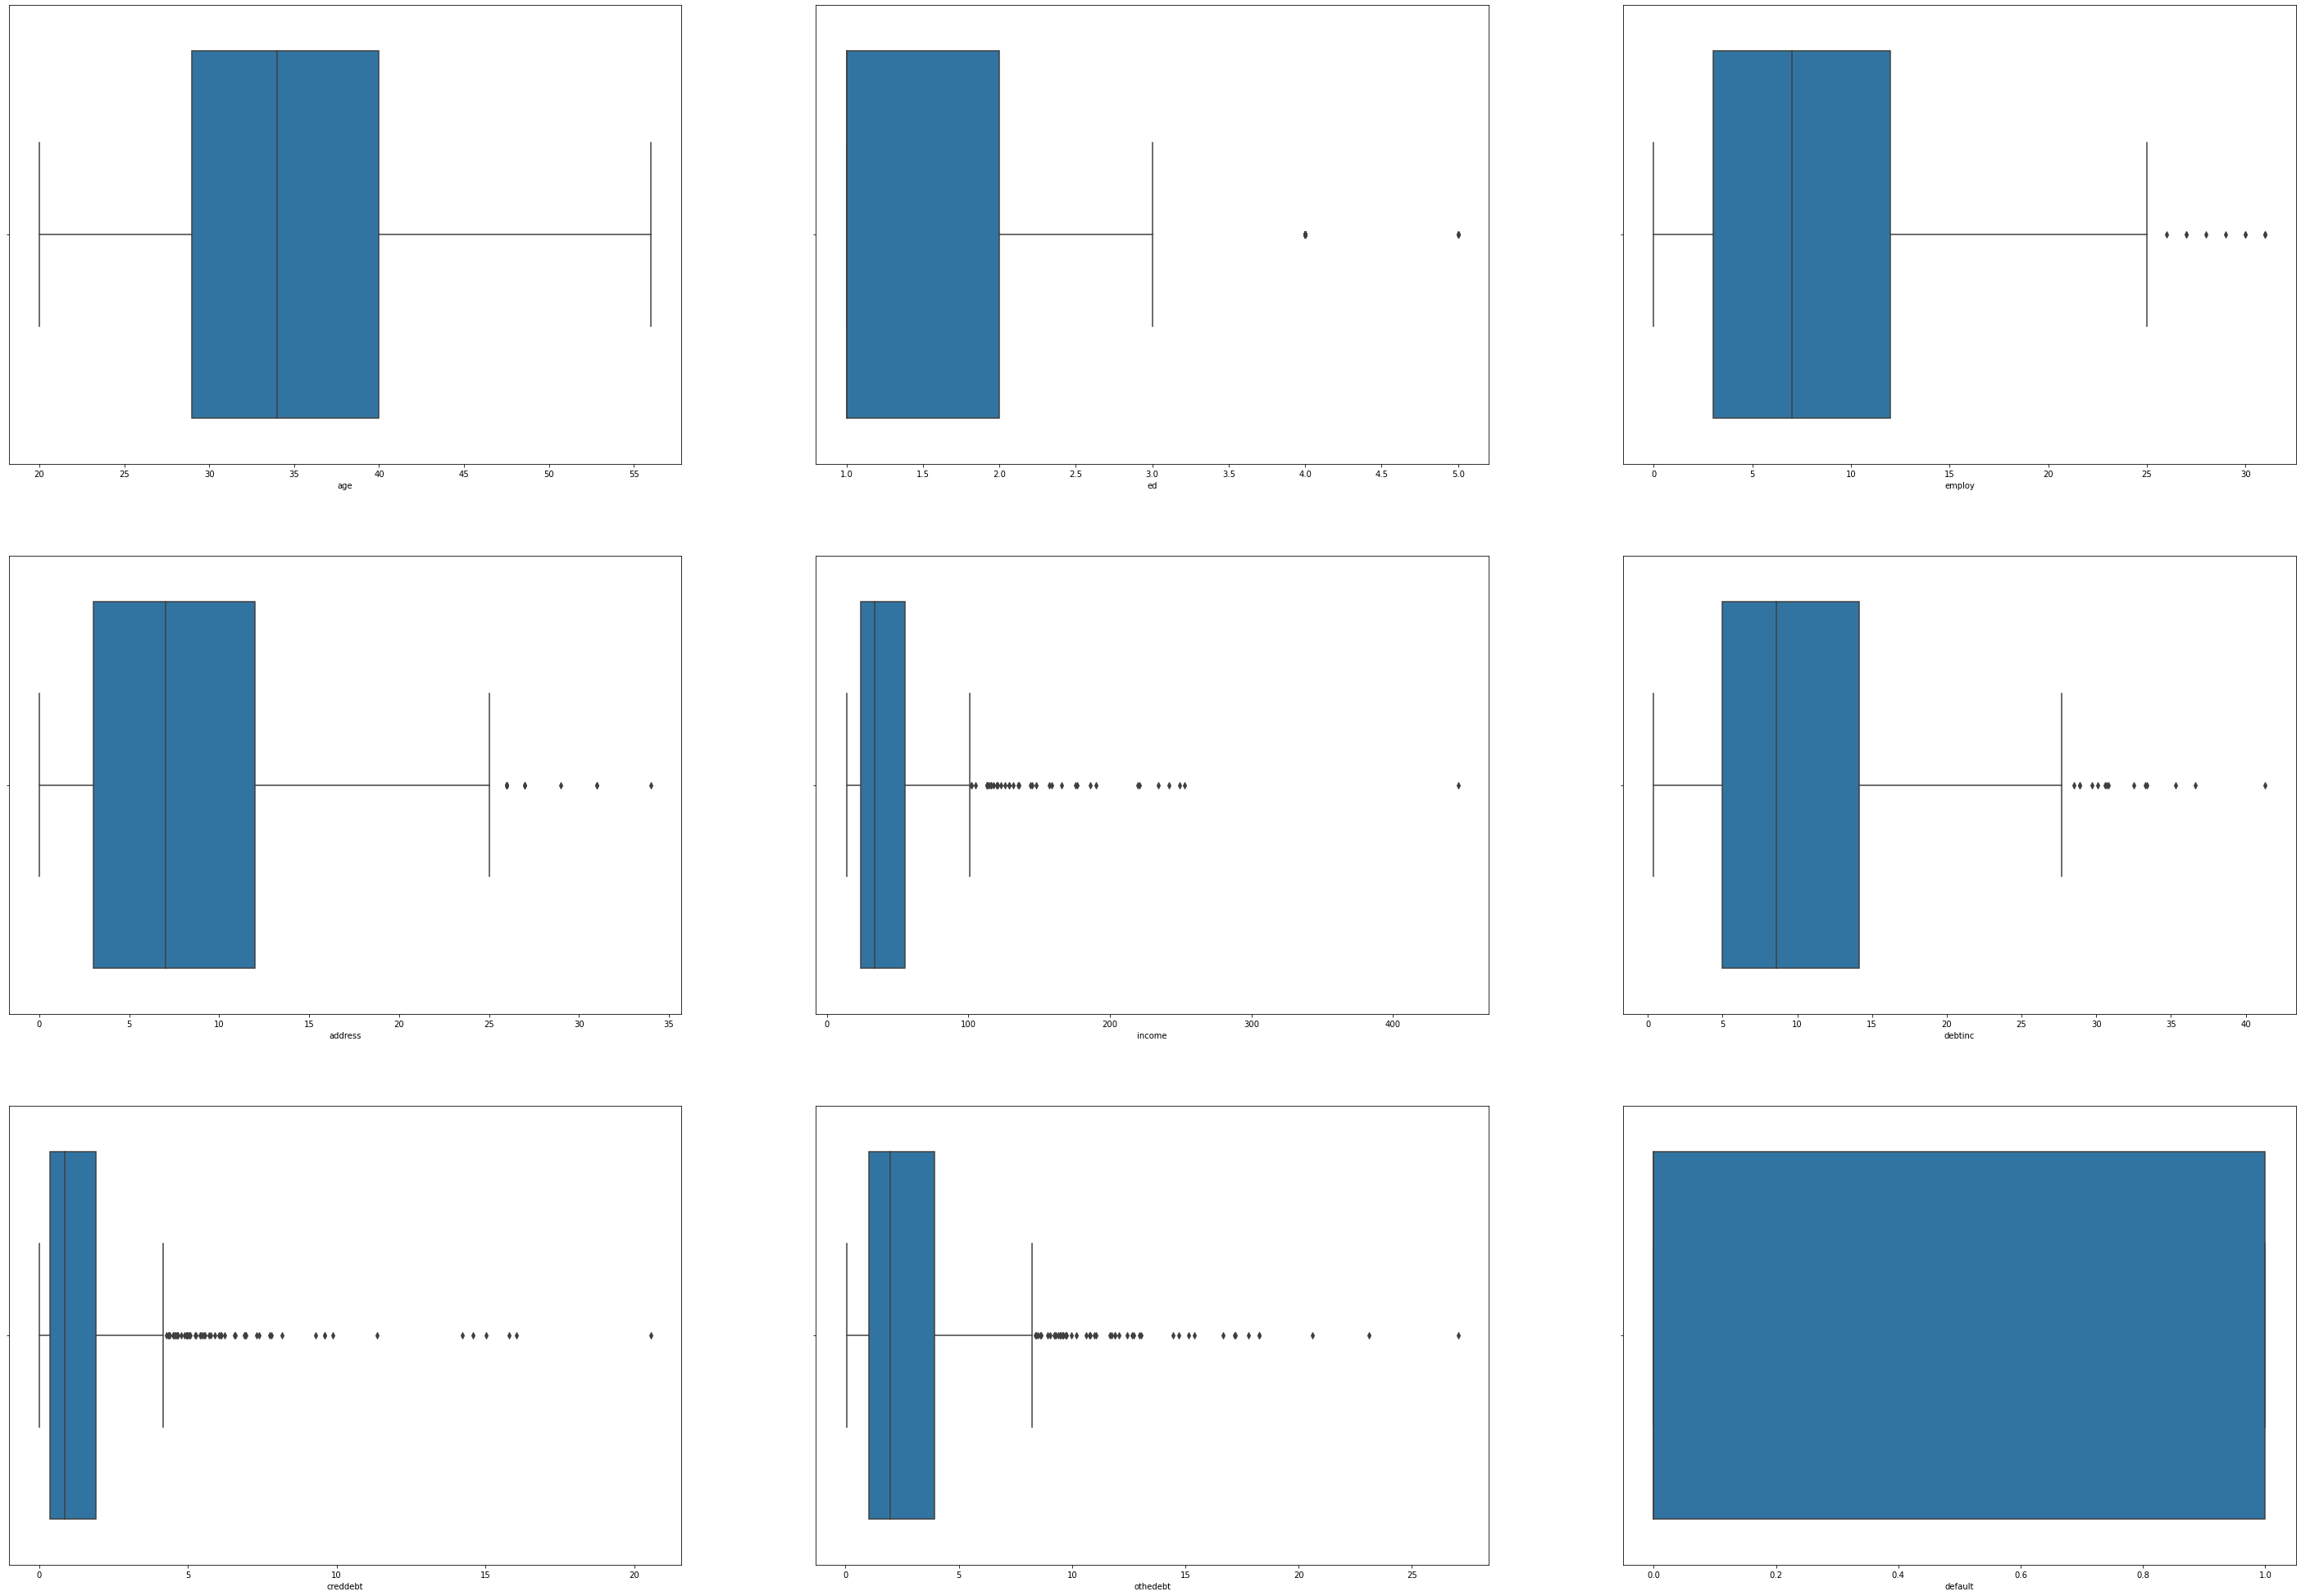

In [229]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize = (50, 35))

# plot the box plot using boxplot() for each numerical variable
for variable, subplot in zip(df1, ax.flatten()):
    sns.boxplot(df1[variable], ax = subplot)

- We plot boxplots to check for outliers.
- Columns except age and default have a lot of outliers.

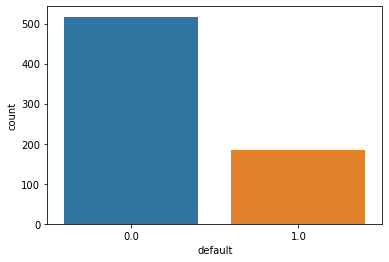

In [230]:
sns.countplot(x=df1['default'])
plt.show()

## Bi-variate Analysis

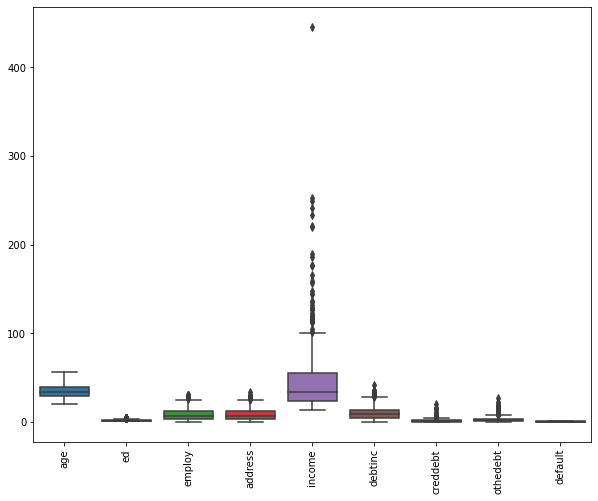

In [231]:
plt.subplots(figsize=(10, 8))
sns.boxplot(data=df1)
plt.xticks(rotation=90)
plt.show()

#### Drawing the pairplot of the numeric variables

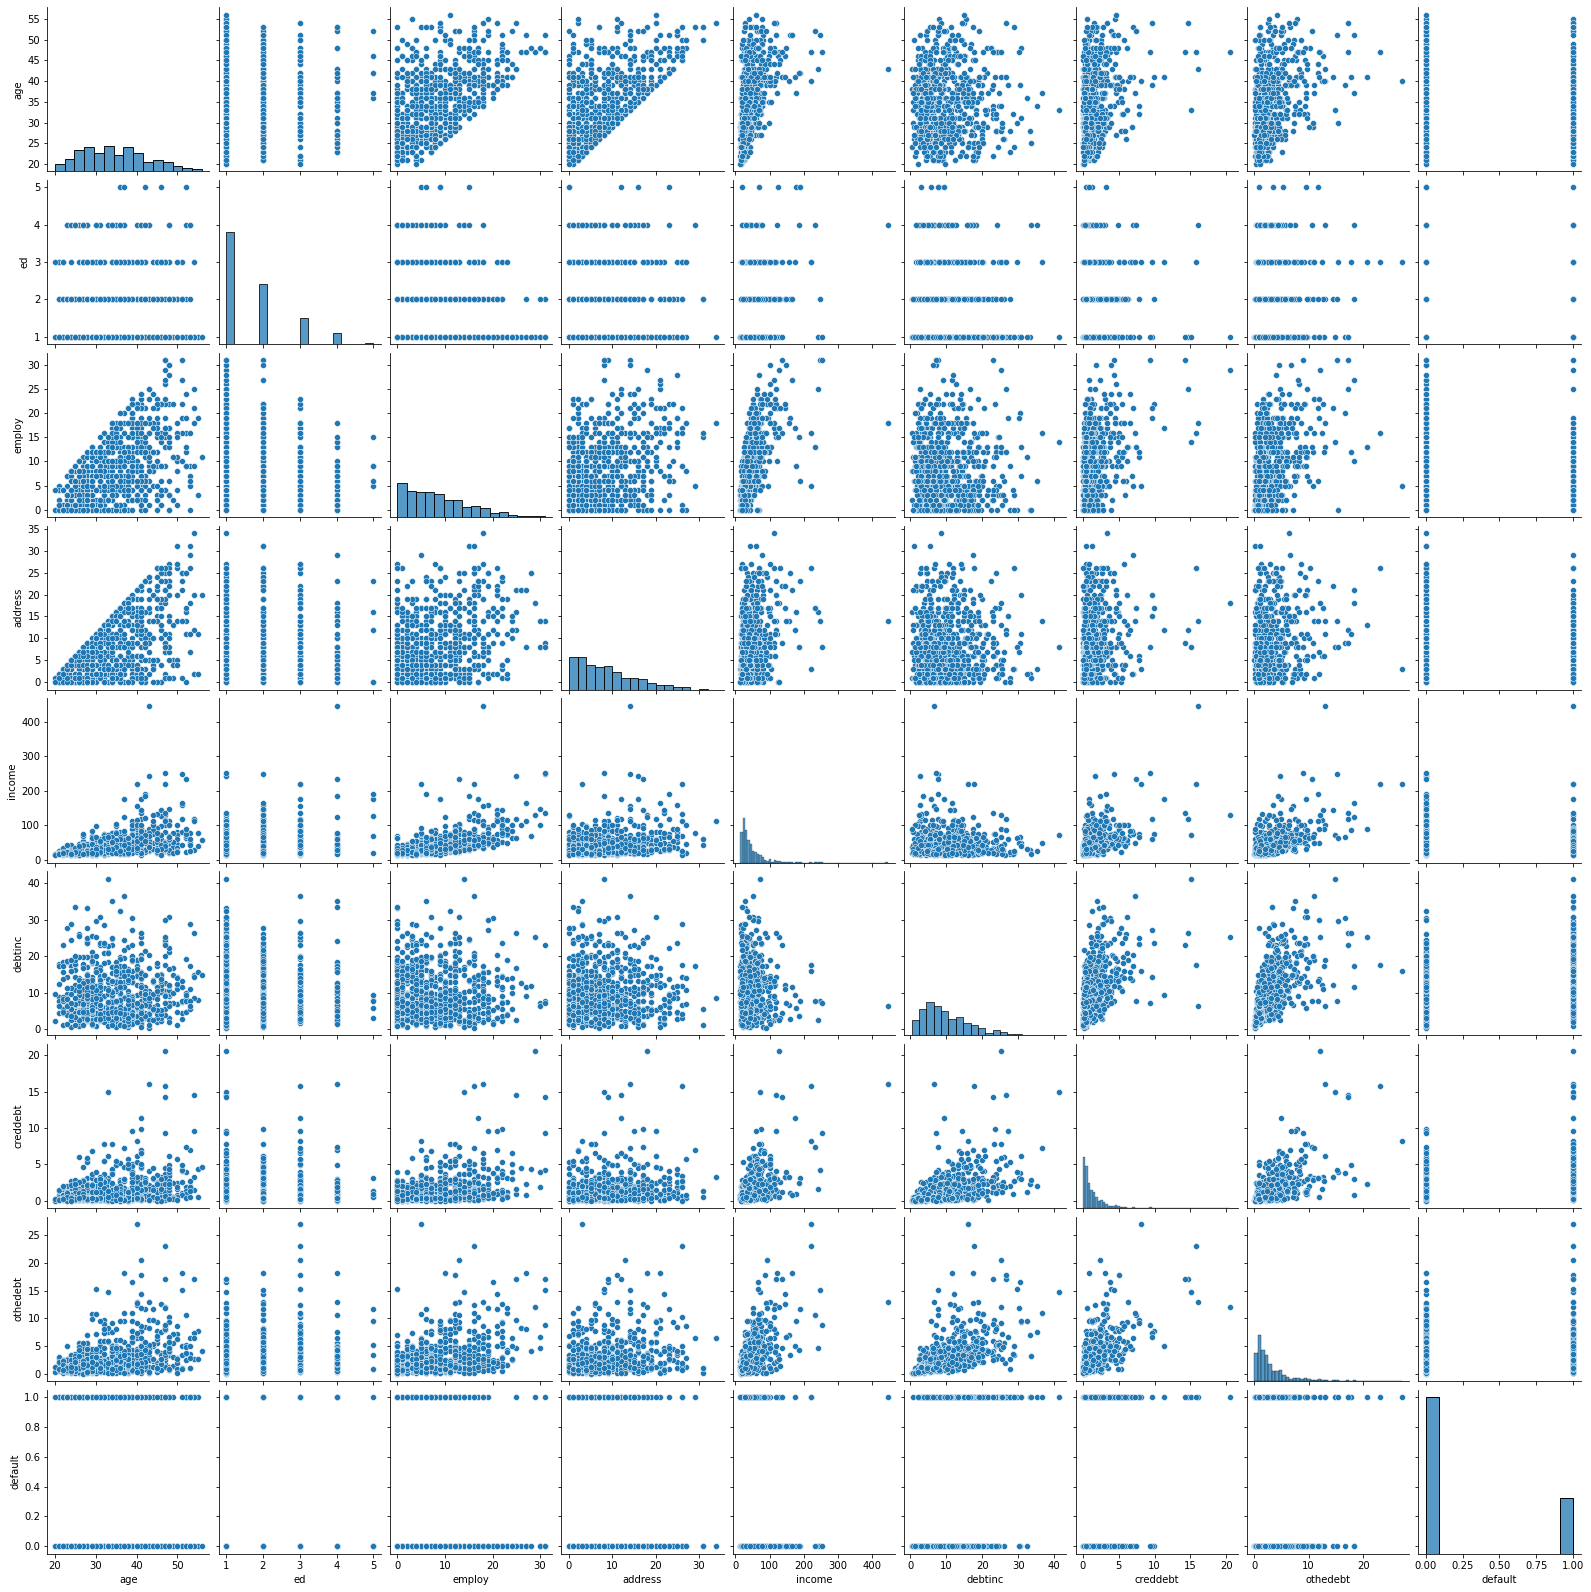

In [232]:
sns.pairplot(data=df1)
plt.show()

## Correlation

To check the correlation between numerical variables, compute a correlation matrix and plot a heatmap for the correlation matrix

In [233]:
corr = df1.corr()
corr

,age,ed,employ,address,income,debtinc,creddebt,othedebt,default
age,1.000000,0.022325,0.536497,0.597591,0.478710,0.016398,0.295207,0.340217,-0.137657
ed,0.022325,1.000000,-0.153621,0.056919,0.235190,0.008838,0.088274,0.165459,0.114676
employ,0.536497,-0.153621,1.000000,0.322334,0.619681,-0.031182,0.403694,0.406091,-0.282978
address,0.597591,0.056919,0.322334,1.000000,0.316245,0.011323,0.208435,0.226514,-0.164451
income,0.478710,0.235190,0.619681,0.316245,1.000000,-0.026777,0.570199,0.610659,-0.070970
debtinc,0.016398,0.008838,-0.031182,0.011323,-0.026777,1.000000,0.501767,0.584870,0.389575
creddebt,0.295207,0.088274,0.403694,0.208435,0.570199,0.501767,1.000000,0.633104,0.244740
othedebt,0.340217,0.165459,0.406091,0.226514,0.610659,0.584870,0.633104,1.000000,0.145713
default,-0.137657,0.114676,-0.282978,-0.164451,-0.070970,0.389575,0.244740,0.145713,1.000000


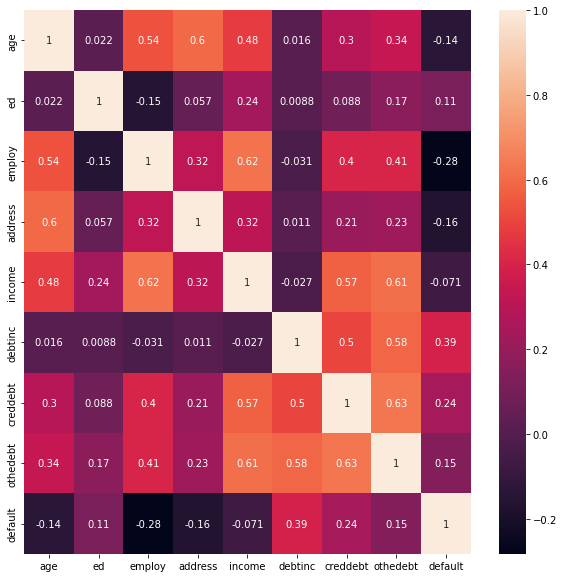

In [234]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

In [235]:
corr['default'].sort_values(ascending=False)

default     1.000000
debtinc     0.389575
creddebt    0.244740
othedebt    0.145713
ed          0.114676
income     -0.070970
age        -0.137657
address    -0.164451
employ     -0.282978
Name: default, dtype: float64

#### Inference
- There aren't any high correlation between default and other features.

## Outlier Treatment

1. 5 point summary
2. 95% or 97% or 98% or 99% percentile as outliers

In [236]:
df1.describe(percentiles=[0.02,0.98])

,age,ed,employ,address,income,debtinc,creddebt,othedebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
2%,22.000000,1.000000,0.000000,0.000000,15.980000,1.200000,0.052661,0.196423,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
98%,52.000000,4.000000,24.000000,25.020000,148.180000,27.716000,7.394810,12.960384,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


In [237]:
def outlier_treatment(x):
    x = x.clip(upper= x.quantile(0.98))
    x = x.clip(lower = x.quantile(0.02))
    return x

In [238]:
df1 = df1.apply(outlier_treatment)

In [239]:
df1.describe(percentiles=[0.02,0.98])

,age,ed,employ,address,income,debtinc,creddebt,othedebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.845714,1.715714,8.312857,8.224686,44.198914,10.177320,1.459458,2.962892,0.261429
std,7.884116,0.906523,6.445822,6.671013,29.237707,6.536416,1.623178,2.856370,0.439727
min,22.000000,1.000000,0.000000,0.000000,15.980000,1.200000,0.052661,0.196423,0.000000
2%,22.000000,1.000000,0.000000,0.000000,15.999600,1.200000,0.052760,0.196510,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
98%,52.000000,4.000000,24.000000,25.000400,148.003600,27.700320,7.387529,12.958567,1.000000
max,52.000000,4.000000,24.000000,25.020000,148.180000,27.716000,7.394810,12.960384,1.000000


### Model Building
Training Machine Learning Algorithms on the training data and making predictions on Test data.

### Building model by splitting training data into train and test data:

<b>1. Split the data into training and test sets

In [240]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]
print(x.shape)
print(y.shape)

(700, 8)
(700,)


In [241]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score,roc_curve

In [242]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(525, 8)
(175, 8)
(525,)
(175,)


<b>2. Building a Model

In [243]:
from sklearn.linear_model import LogisticRegression

In [244]:
m1 = LogisticRegression(max_iter=1000)
m1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [245]:
# Model score - R2_Score
print('Training score',m1.score(x_train,y_train))
print('Testing score',m1.score(x_test,y_test))

Training score 0.8019047619047619
Testing score 0.8114285714285714


<b> 3. Predicting the Y-Pred Values

In [246]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0.]


In [247]:
cm_m1 = confusion_matrix(y_test,ypred_m1)
print(cm_m1)
print(classification_report(y_test,ypred_m1))

[[118   9]
 [ 24  24]]
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       127
         1.0       0.73      0.50      0.59        48

    accuracy                           0.81       175
   macro avg       0.78      0.71      0.73       175
weighted avg       0.80      0.81      0.80       175



In [248]:
auc_score1 = roc_auc_score(y_test,m1.predict_proba(x_test)[:,1])
print('Area Under Curve',auc_score1)

Area Under Curve 0.8579396325459318


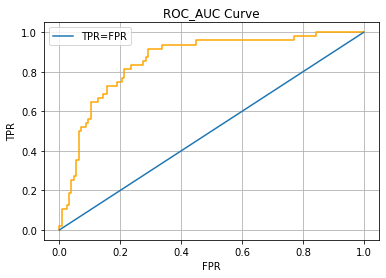

In [249]:
fpr,tpr,thresh = roc_curve(y_test,m1.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,color='orange')
plt.plot([0,1],[0,1],label='TPR=FPR')
plt.title('ROC_AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend()
plt.show()


#### Making Predictions on test data:

In [250]:
test= pd.read_csv('bankdata_test.csv') #test data
test.head()

,age,ed,employ,address,income,debtinc,creddebt,othedebt
0,32,4,7,6.0,73,1.40,3.00,2.34
1,45,4,15,15.0,120,4.78,4.67,5.78
2,32,4,7,6.0,73,10.34,3.00,2.34
3,24,3,2,2.5,25,32.00,8.00,0.00
4,32,1,7,5.0,105,12.00,9.00,3.00


In [251]:
test.shape

(5, 8)

In [252]:
ypred_test  = m1.predict(test)
print(ypred_test)

[0. 0. 1. 1. 1.]


In [253]:
m1.predict_proba(test)

array([[0.63397781, 0.36602219],
       [0.84176428, 0.15823572],
       [0.4899721 , 0.5100279 ],
       [0.00197529, 0.99802471],
       [0.02475089, 0.97524911]])

### SGDClassifier

In [254]:
from sklearn.linear_model import SGDClassifier

In [255]:
m2 = SGDClassifier(max_iter=250,eta0=0.001,loss='log')
m2.fit(x_train,y_train)

SGDClassifier(eta0=0.001, loss='log', max_iter=250)

In [256]:
print('Training score',m2.score(x_train,y_train))
print('Testing score',m2.score(x_test,y_test))

Training score 0.7847619047619048
Testing score 0.7657142857142857


In [257]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

[0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0.]


In [258]:
cm_m2 = confusion_matrix(y_test,ypred_m2)
print(cm_m2)
print(classification_report(y_test,ypred_m2))

[[117  10]
 [ 31  17]]
              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85       127
         1.0       0.63      0.35      0.45        48

    accuracy                           0.77       175
   macro avg       0.71      0.64      0.65       175
weighted avg       0.75      0.77      0.74       175



In [259]:
auc_score2 = roc_auc_score(y_test,m2.predict_proba(x_test)[:,1])
print('Area Under Curve',auc_score2)

Area Under Curve 0.7903543307086615


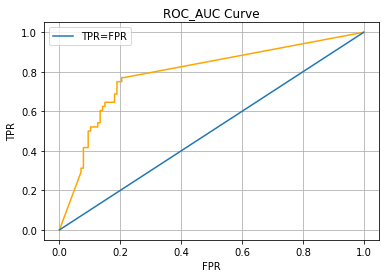

In [260]:
fpr,tpr,thresh = roc_curve(y_test,m2.predict_proba(x_test)[:,1])
plt.plot(fpr,tpr,color='orange')
plt.plot([0,1],[0,1],label='TPR=FPR')
plt.title('ROC_AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend()
plt.show()

#### Making Predictions on test data:

In [261]:
ypred_test2  = m2.predict(test)
print(ypred_test2)

[0. 0. 0. 1. 0.]


In [262]:
m2.predict_proba(test)

array([[1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 1.61213059e-115]])

### Training ML model on entire data

In [263]:
m3 = LogisticRegression(max_iter=1000)
m3.fit(x,y)

LogisticRegression(max_iter=1000)

In [264]:
print('Training score',m3.score(x,y))

Training score 0.81


In [265]:
auc_score3 = roc_auc_score(y,m3.predict_proba(x)[:,1])
print('Area Under Curve',auc_score3)

Area Under Curve 0.8526069907304648


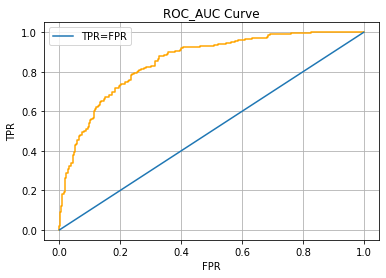

In [266]:
fpr,tpr,thresh = roc_curve(y,m3.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='orange')
plt.plot([0,1],[0,1],label='TPR=FPR')
plt.title('ROC_AUC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.legend()
plt.show()

#### Making Predictions on test data:

In [267]:
ypred_test3  = m3.predict(test)
print(ypred_test3)

[0. 0. 0. 1. 1.]


### Conclusion:
- After training the entire ML Model we see that the predictions for the test data are:[0,0,0,1,1]
- Our Model has about 81% accuracy.